In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) 
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))

In [2]:
pr_file_path <- file.path("../../../results/2.modeling/precision_recall_scores.csv.gz")
pr_df <- read.csv(pr_file_path)

# update one of the shuffled_model columns to Shuffled and Not Shuffled
pr_df$shuffled <- ifelse(pr_df$shuffled == "False", "Not Shuffled",
                            ifelse(pr_df$shuffled == "True", "Shuffled", pr_df$shuffled))

head(pr_df)


,dataset_type,shuffled,injury_type,precision,recall
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,test,Not Shuffled,Control,0.6227323,1
2,test,Not Shuffled,Control,0.6229630,1
3,test,Not Shuffled,Control,0.6231938,1
4,test,Not Shuffled,Control,0.6234248,1
5,test,Not Shuffled,Control,0.6236559,1
6,test,Not Shuffled,Control,0.6238872,1


In [3]:
# Define the desired order of dataset_type
dataset_order <- c("test", "train", "plate_holdout", "treatment_holdout", "well_holdout")
pr_df$dataset_type <- factor(pr_df$dataset_type, levels = dataset_order)

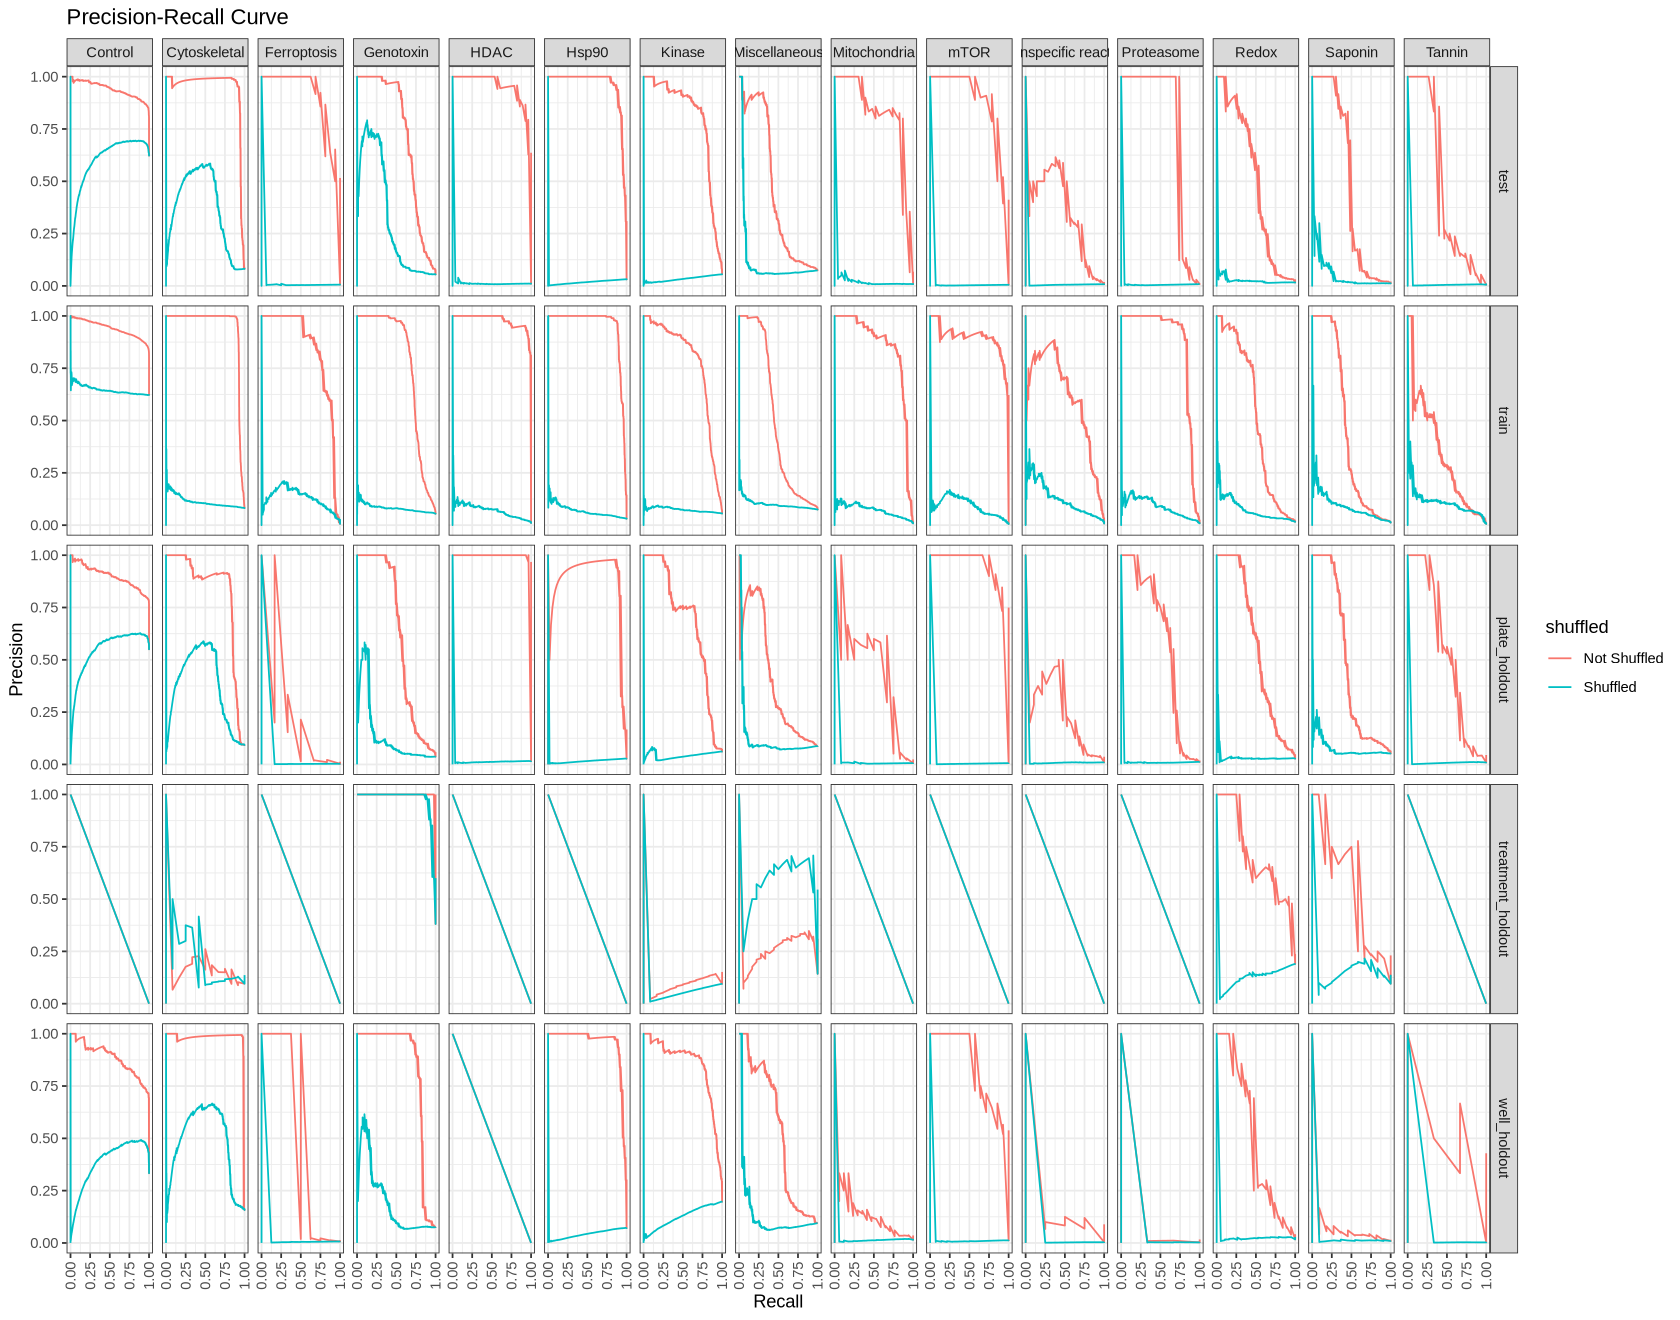

In [4]:
width <- 14
height <- 11
options(repr.plot.width = width, repr.plot.height = height)

ggplot(pr_df, aes(x = recall, y = precision, color = shuffled)) +
geom_line() +
facet_grid(dataset_type~injury_type) +
labs(x = "Recall", y = "Precision", title = "Precision-Recall Curve") +
theme_bw() +

# rotating ticks by 90 degress
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) 


ggsave("full_pr_curves.png", width = width, height = height, dpi=600)

Next is to create a PR curve that merges both the train and test lines

In [5]:
# Filter the dataframe to select only "test", "train", and "plate_holdout" datasets
filtered_pr_df <- pr_df %>%
  filter(dataset_type %in% c("test", "train"))


# Create line_id column
filtered_pr_df <- filtered_pr_df %>%
  mutate(line_id = case_when(
    dataset_type == "test" & shuffled == "Not Shuffled" ~ "Test + Not Shuffled",
    dataset_type == "test" & shuffled == "Shuffled" ~ "Test + Shuffled",
    dataset_type == "train" & shuffled == "Not Shuffled" ~ "Train + Not Shuffled",
    dataset_type == "train" & shuffled == "Shuffled" ~ "Train + Shuffled",
  )) %>% 
  mutate(is_train_test = if_else(dataset_type %in% c("test", "train"), "test_train", "plate_holdout"))

head(filtered_pr_df)

,dataset_type,shuffled,injury_type,precision,recall,line_id,is_train_test
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,test,Not Shuffled,Control,0.6227323,1,Test + Not Shuffled,test_train
2,test,Not Shuffled,Control,0.6229630,1,Test + Not Shuffled,test_train
3,test,Not Shuffled,Control,0.6231938,1,Test + Not Shuffled,test_train
4,test,Not Shuffled,Control,0.6234248,1,Test + Not Shuffled,test_train
5,test,Not Shuffled,Control,0.6236559,1,Test + Not Shuffled,test_train
6,test,Not Shuffled,Control,0.6238872,1,Test + Not Shuffled,test_train


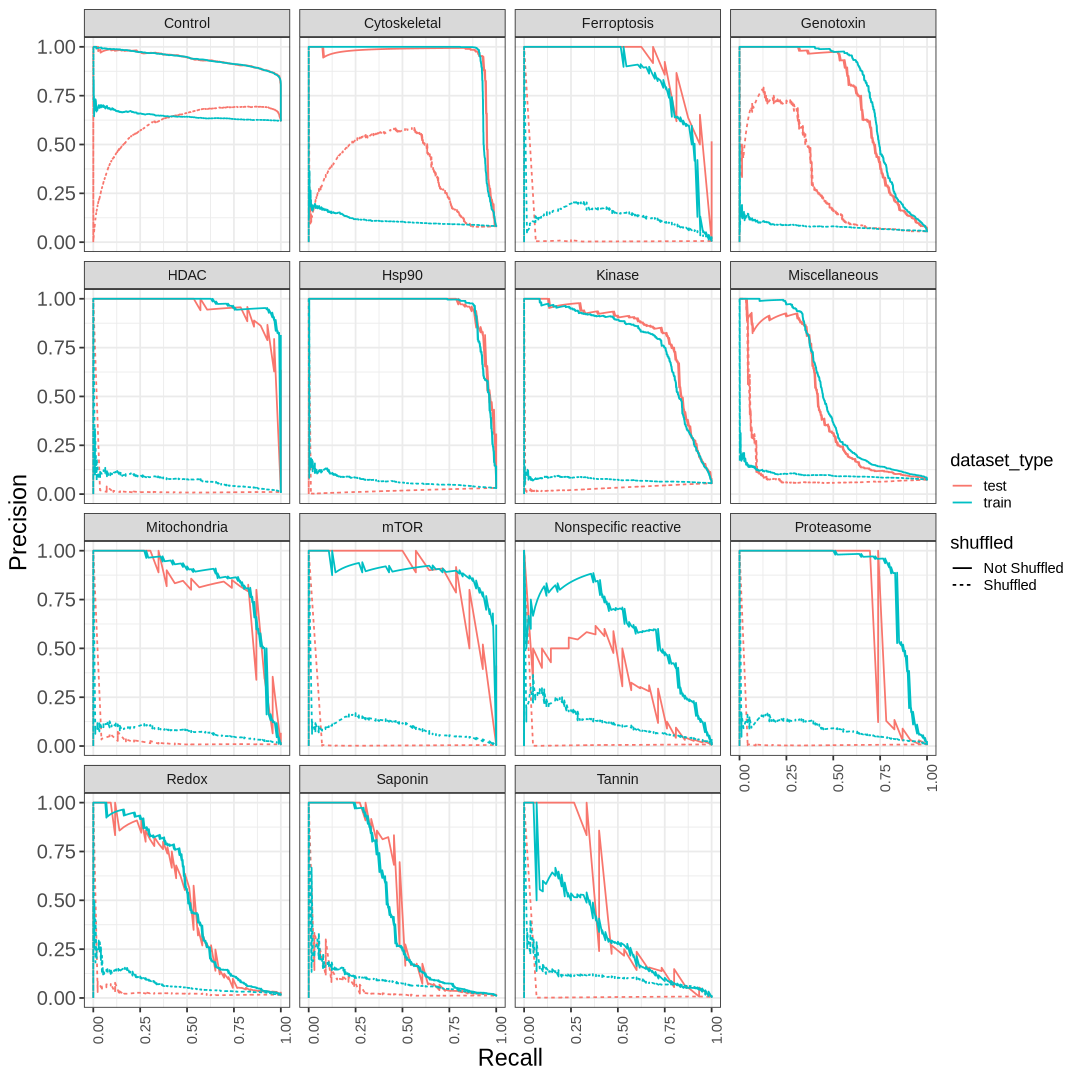

In [6]:
width <- 9
height <- 9
options(repr.plot.width = width, repr.plot.height = height)


ggplot(filtered_pr_df, aes(x = recall, y = precision)) +
    geom_line(aes(color = dataset_type, linetype = shuffled)) +
    facet_wrap(~injury_type) + 
    xlab("Recall") + 
    ylab("Precision") + 
    theme_bw() + 
    theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90),
        strip.text = element_text(size = 8.5),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 14))

ggsave("only_test_train_pr_curve.png", width = width, height = height, dpi=600)